<a href="https://colab.research.google.com/github/Kishorevasan2002/Chat_Gpt_Review_Analysis-/blob/main/ChatGpt_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project data/chatgpt_reviews (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
print(df.head(5))

In [ ]:
# Standardize column names: convert to lowercase and replace spaces with underscores.
df.columns = df.columns.str.lower().str.replace(' ', '_')

print(df.columns)

Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')


In [ ]:
print(df.isnull().sum())

review_id      0
review         6
ratings        0
review_date    0
dtype: int64


In [ ]:
df['review'] = df['review'].fillna('')
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
print(df.isnull().sum())

review_id      0
review         0
ratings        0
review_date    0
dtype: int64


In [ ]:
#Calculateing Sentiment polarity.
def get_sentiment_polarity(text):
    if pd.isna(text) or text == '':
        return 0
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

df['sentiment_polarity'] = df['review'].apply(get_sentiment_polarity)

In [ ]:
# Assigning Sentiment Category based on Polarity
def get_sentiment_category(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_polarity'].apply(get_sentiment_category)

In [ ]:
# Calculateing Sentiment Subjectivity
def get_sentiment_subjectivity(text):
    if pd.isna(text) or text == '':
        return 0
    blob = TextBlob(str(text))
    return blob.sentiment.subjectivity

df['sentiment_subjectivity'] = df['review'].apply(get_sentiment_subjectivity)

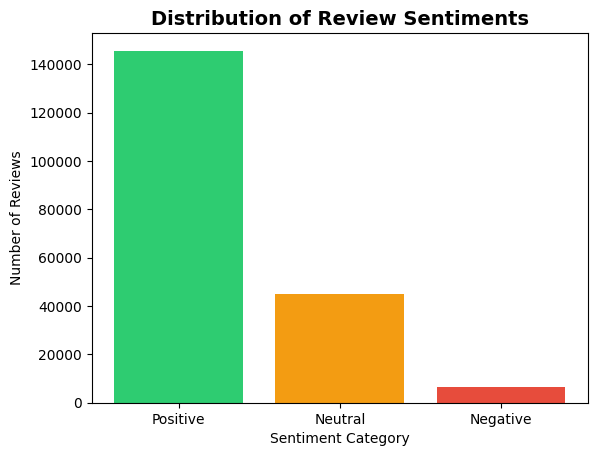

In [ ]:
sentiment_counts = df['sentiment_category'].value_counts()
colors = ['#2ecc71', '#f39c12', '#e74c3c']
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.title('Distribution of Review Sentiments', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

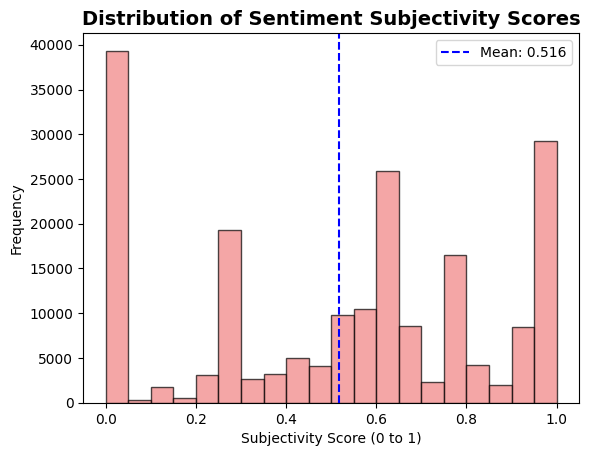

In [ ]:
# Sentiment Subjectivity Distribution
plt.hist(df['sentiment_subjectivity'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.axvline(df['sentiment_subjectivity'].mean(), color='blue', linestyle='--',
            label=f'Mean: {df["sentiment_subjectivity"].mean():.3f}')
plt.title('Distribution of Sentiment Subjectivity Scores', fontsize=14, fontweight='bold')
plt.xlabel('Subjectivity Score (0 to 1)')
plt.ylabel('Frequency')
plt.legend()

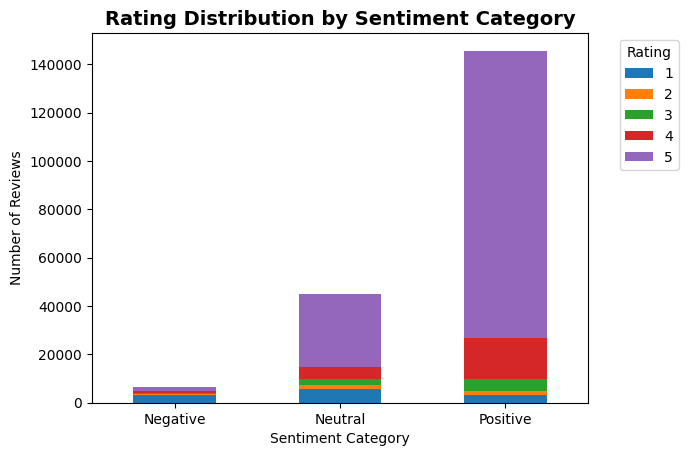

In [ ]:
# Rating Distribution by Sentiment Category
sentiment_rating = df.groupby(['sentiment_category', 'ratings']).size().unstack(fill_value=0)
sentiment_rating.plot(kind='bar', stacked=True)
plt.title('Rating Distribution by Sentiment Category', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

In [ ]:
positive_reviews = df[df['sentiment_category'] == 'Positive']['review']

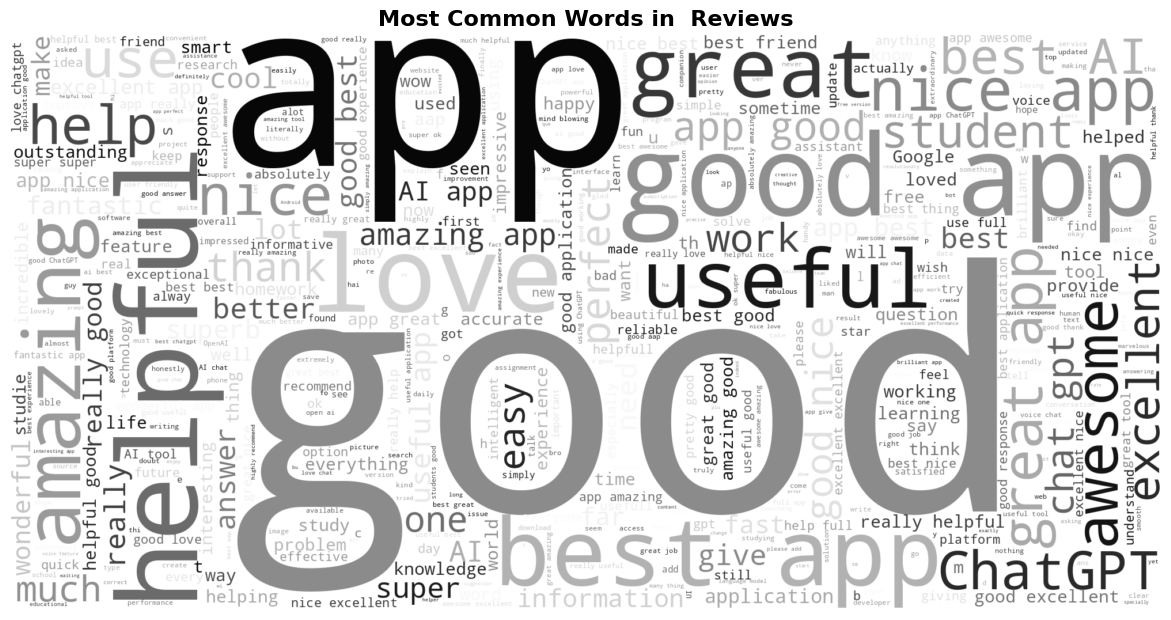

In [ ]:
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='gray',
    max_words=500,
    contour_width=2,
    contour_color='black',
    prefer_horizontal=0.9,
    random_state=42,
    scale=2
).generate(positive_reviews.to_string())

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in  Reviews', fontsize=16, fontweight='bold')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
negative_reviews = df[df['sentiment_category'] == 'Negative']['review']

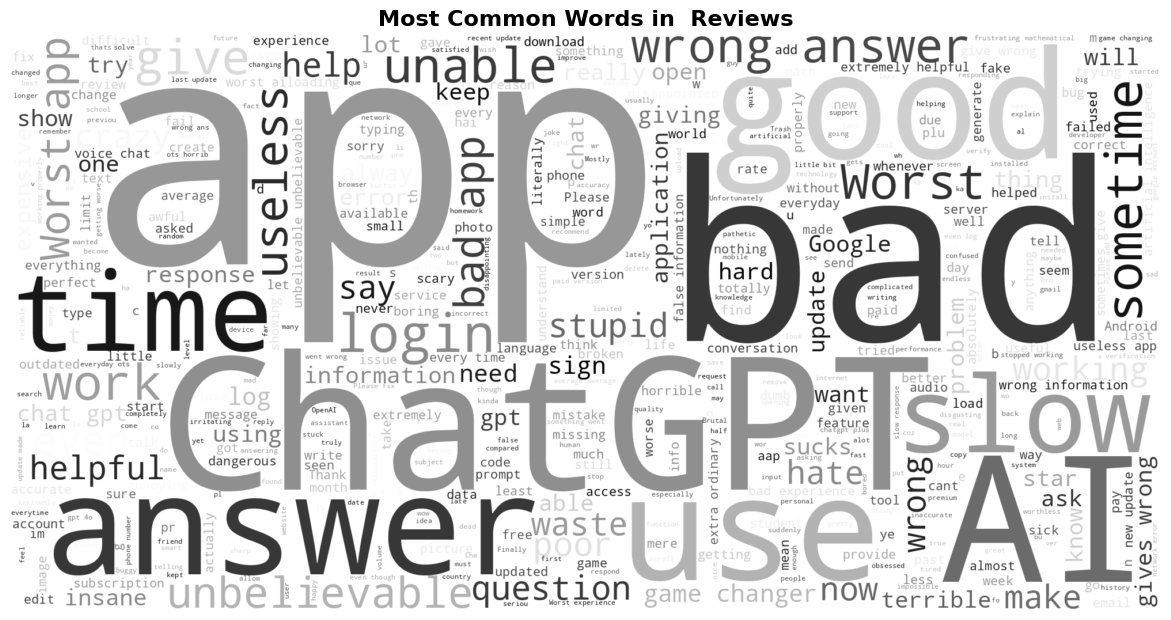

In [ ]:
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='gray',
    max_words=500,
    contour_width=2,
    contour_color='black',
    prefer_horizontal=0.9,
    random_state=42,
    scale=2
).generate(negative_reviews.to_string())

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in  Reviews', fontsize=16, fontweight='bold')
plt.tight_layout(pad=0)
plt.show()

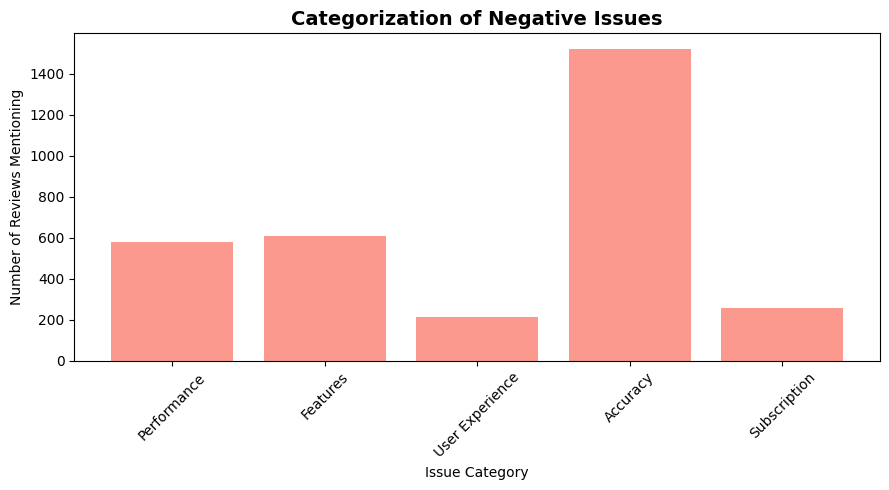

In [ ]:
# Converting all negative reviews to lowercase strings once
lower_reviews = [str(review).lower() for review in negative_reviews]

# Defineing issue categories with keywords
issue_categories = {
    'Performance': ['slow', 'lag', 'crash', 'freeze', 'glitch', 'bug', 'error'],
    'Features': ['missing', 'lack', 'need', 'want', 'should', 'feature'],
    'User Experience': ['confusing', 'difficult', 'hard', 'complicated', 'interface'],
    'Accuracy': ['wrong', 'incorrect', 'bad', 'poor', 'inaccurate', 'mistake'],
    'Subscription': ['expensive', 'price', 'cost', 'pay', 'subscription', 'money']
}

# Count matching reviews per category
category_counts = {
    category: sum(any(keyword in review for keyword in keywords) for review in lower_reviews)
    for category, keywords in issue_categories.items()
}
# plot
plt.figure(figsize=(9, 5))
plt.bar(category_counts.keys(), category_counts.values(), color='salmon', alpha=0.8)
plt.title('Categorization of Negative Issues', fontsize=14, fontweight='bold')
plt.xlabel('Issue Category')
plt.ylabel('Number of Reviews Mentioning')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
neutral_reviews = df[df['sentiment_category'] == 'Neutral']

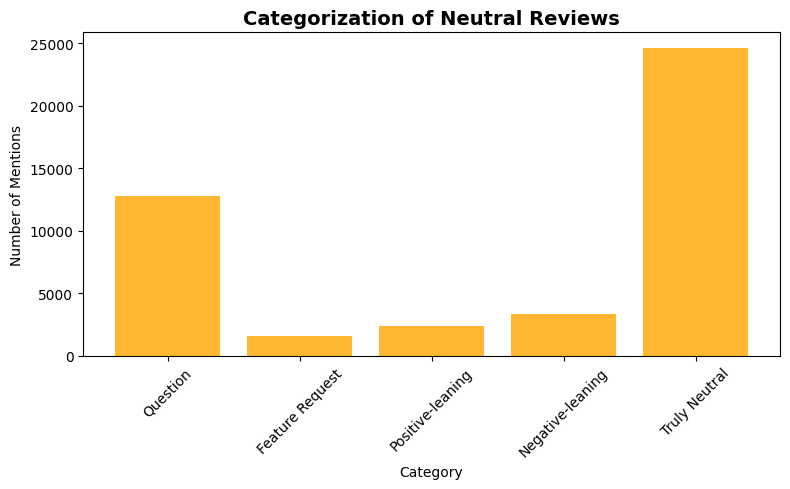

In [ ]:
# Extracting text
neutral_texts = neutral_reviews['review'].astype(str).str.lower()

# keyword mapping
keyword_map = {
    'Feature Request': ['add', 'include', 'feature', 'option', 'setting', 'would like', 'wish', 'hope'],
    'Question': ['how', 'what', 'why', 'when', 'where', 'can', 'does', 'is', '?'],
    'Positive-leaning': ['good', 'nice', 'ok', 'fine', 'decent', 'works'],
    'Negative-leaning': ['but', 'however', 'issue', 'problem', 'concern', 'could be better'],
}

# Classify each text into categories
neutral_categories = [
    label
    for text in neutral_texts
    for label, keywords in keyword_map.items()
    if any(kw in text for kw in keywords)
] or ['Truly Neutral']  # fallback if all are empty

# Handle texts with no matching category
if len(neutral_categories) < len(neutral_texts):
    neutral_categories.extend(['Truly Neutral'] * (len(neutral_texts) - len(neutral_categories)))

# Count and plot
category_counts = Counter(neutral_categories)

plt.figure(figsize=(8, 5))
plt.bar(category_counts.keys(), category_counts.values(), color='orange', alpha=0.8)
plt.title('Categorization of Neutral Reviews', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

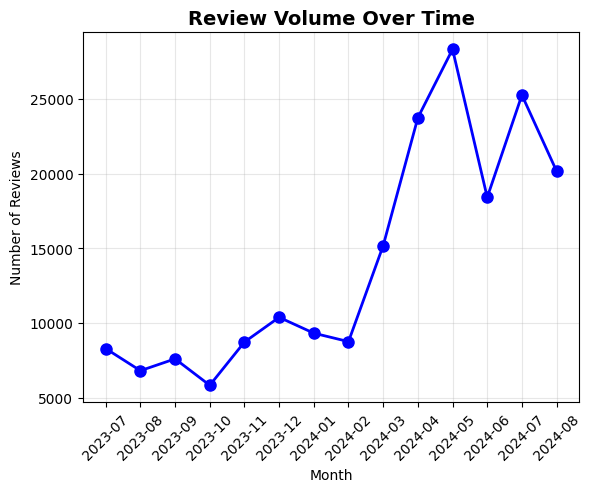

In [ ]:
monthly_counts = df.groupby('Review_Month').size()
plt.plot(monthly_counts.index.astype(str), monthly_counts.values,
         marker='o', linewidth=2, markersize=8, color='blue')

plt.title('Review Volume Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.show()

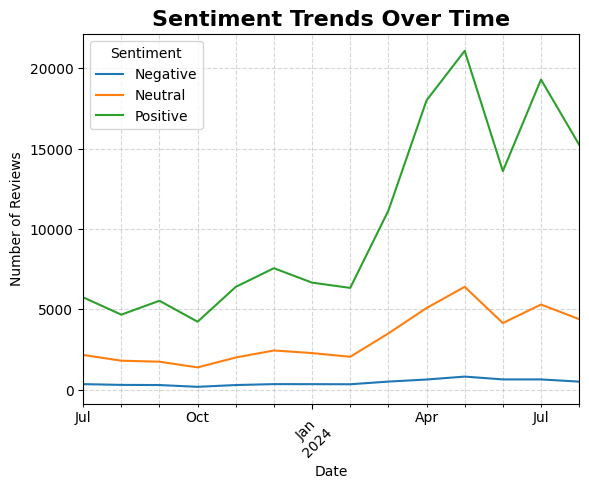

In [ ]:
import matplotlib.pyplot as plt

df['review_date'] = pd.to_datetime(df['review_date'])

sentiment_over_time = df.groupby([df['review_date'].dt.to_period('M'), 'sentiment_category']) \
                        .size().unstack(fill_value=0)

sentiment_over_time.index = sentiment_over_time.index.to_timestamp()
sentiment_over_time.plot()

plt.title('Sentiment Trends Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

plt.show()